In [1]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Step 2: Load and Explore the Dataset
file_path = '/Users/henriettaokoli/Downloads/weight_change_dataset (1).csv'  # Replace with the correct file path
df = pd.read_csv(file_path)


In [3]:
# Display the first few rows and basic info
print("Data Preview:")
print(df.head())
print("\nData Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe(include='all'))


Data Preview:
   Participant ID  Age Gender  Current Weight (lbs)  BMR (Calories)  \
0               1   56      M                 228.4          3102.3   
1               2   46      F                 165.4          2275.5   
2               3   32      F                 142.8          2119.4   
3               4   25      F                 145.5          2181.3   
4               5   38      M                 155.5          2463.8   

   Daily Calories Consumed  Daily Caloric Surplus/Deficit  \
0                   3916.0                          813.7   
1                   3823.0                         1547.5   
2                   2785.4                          666.0   
3                   2587.3                          406.0   
4                   3312.8                          849.0   

   Weight Change (lbs)  Duration (weeks) Physical Activity Level  \
0                  0.2                 1               Sedentary   
1                  2.4                 6             Ver

In [4]:
# Step 3: Data Preprocessing
# Encode categorical columns: 'Gender', 'Physical Activity Level', 'Sleep Quality'
df_encoded = df.copy()
le_gender = LabelEncoder()
le_activity = LabelEncoder()
le_sleep = LabelEncoder()
df_encoded['Gender'] = le_gender.fit_transform(df_encoded['Gender'])
df_encoded['Physical Activity Level'] = le_activity.fit_transform(df_encoded['Physical Activity Level'])
df_encoded['Sleep Quality'] = le_sleep.fit_transform(df_encoded['Sleep Quality'])


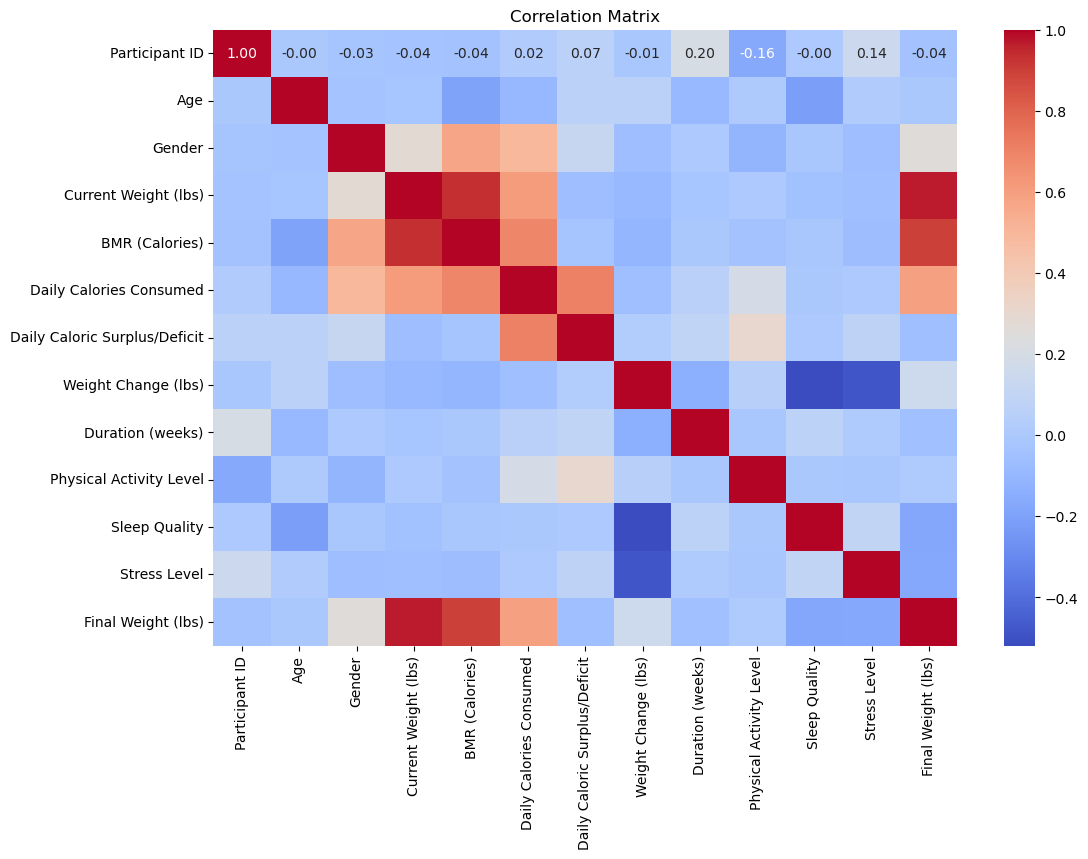

In [5]:

# Step 4: Correlation Analysis
# Compute and visualize correlation matrix
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


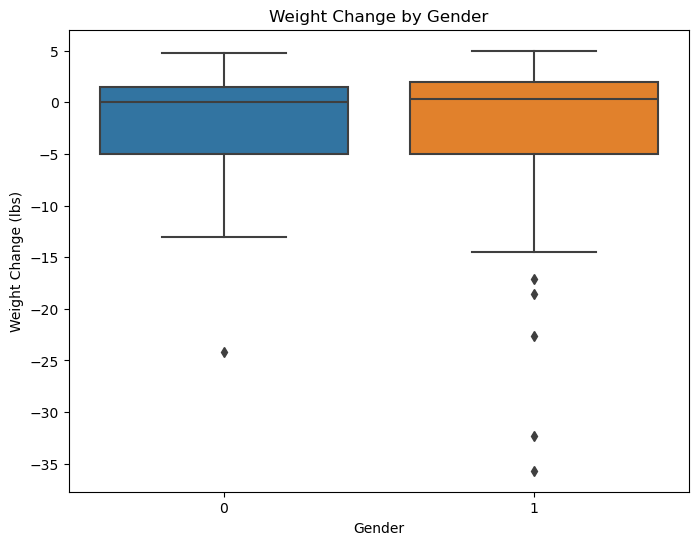

In [6]:
# Step 5: Exploratory Data Analysis (EDA)
# 1. Distribution of Weight Change by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Weight Change (lbs)', data=df_encoded)
plt.title("Weight Change by Gender")
plt.show()

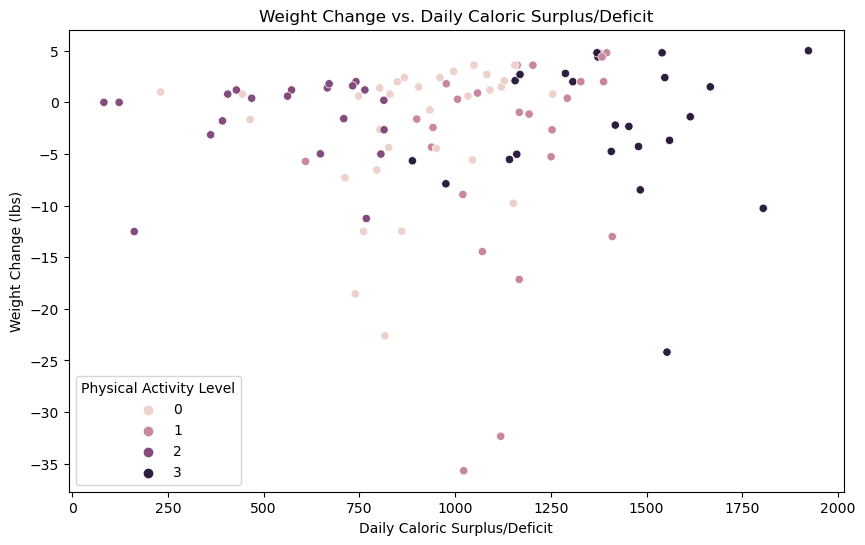

In [7]:
# 2. Scatter plot of Weight Change vs Daily Caloric Surplus/Deficit by Physical Activity Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Caloric Surplus/Deficit', y='Weight Change (lbs)', hue='Physical Activity Level', data=df_encoded)
plt.title("Weight Change vs. Daily Caloric Surplus/Deficit")
plt.show()

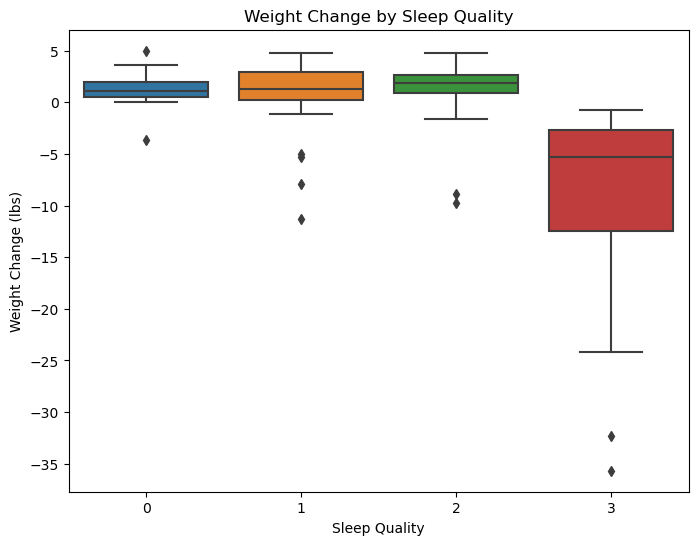

In [8]:
# 3. Effect of Sleep Quality on Weight Change
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Quality', y='Weight Change (lbs)', data=df_encoded)
plt.title("Weight Change by Sleep Quality")
plt.show()

In [9]:
# Step 6: Predictive Modeling (Optional - Predicting Final Weight)
# Define target and features
X = df_encoded.drop(['Final Weight (lbs)', 'Participant ID'], axis=1)
y = df_encoded['Final Weight (lbs)']


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [12]:
print("\nModel Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Evaluation:
Mean Absolute Error: 0.015031434732772908
Mean Squared Error: 0.00048120862788904897
R-squared: 0.9999996119012651
